In [1]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

**Load faces**

In [11]:


# Create arrays of known face encodings and their names
known_face_encodings = [
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/dung.jpg'))[0],
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/khanh.jpg'))[0],
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/tu.jpg'))[0],
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/tuan.jpg'))[0],
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/duong.jpg'))[0],
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/tran_tuan.jpg'))[0],
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/thinh.jpg'))[0],
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/son.jpg'))[0],
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/cuong.jpg'))[0],
face_recognition.face_encodings(face_recognition.load_image_file('agiletech/know/chung.jpg'))[0],
]
known_face_names = [
    "Dung",
    "Gia Khanh",
    "Thanh Tu",
    "Anh Tuan",
    "Duong",
    "Tran Tuan",
    "Thinh",
    "Son",
    "Cuong",
    "Chung"
]

face names: ['', 'Chung:57.56%', 'Dung:55.12%', 'Duong:54.39%', 'Anh Tuan:61.93%', 'Thinh:57.47%', 'Thanh Tu:70.79%', '', '', '', 'Son:57.28%', '', '', 'Gia Khanh:65.46%', 'Cuong:54.93%', 'Dung:62.9%']


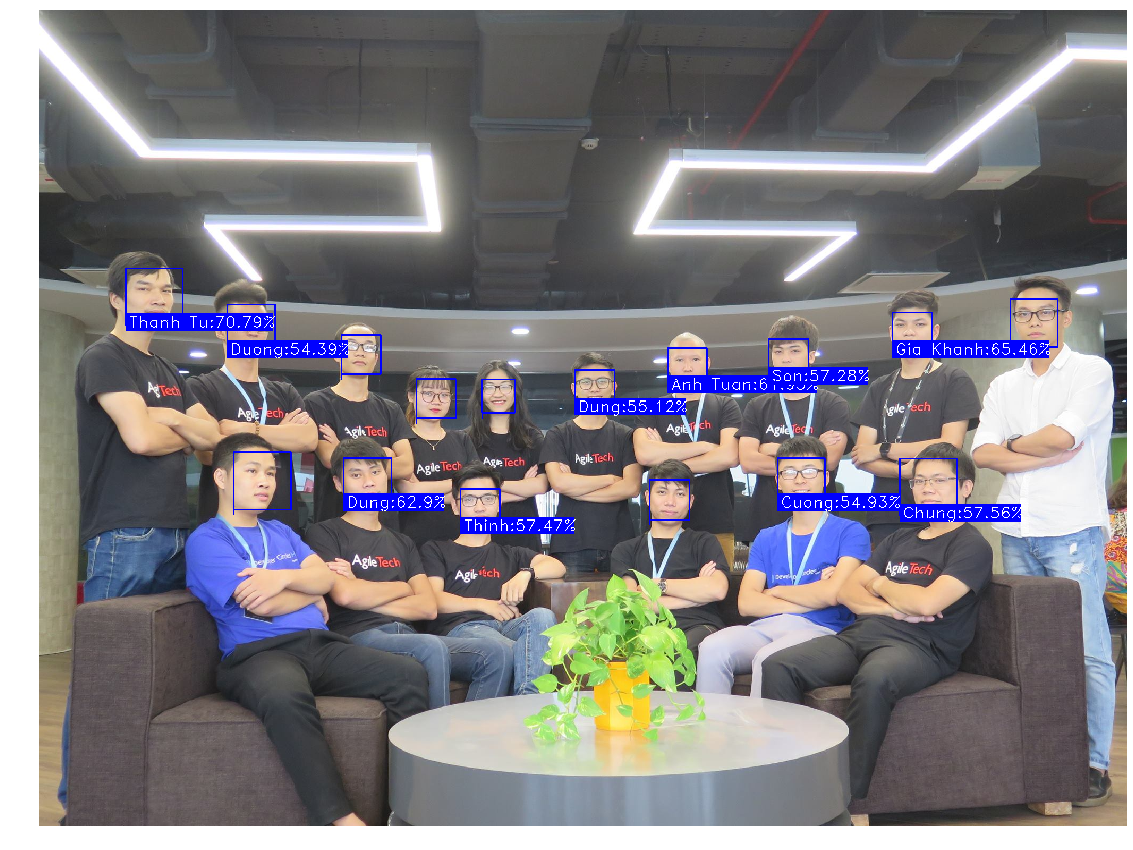

In [12]:
# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
tolerance = 0.5
scale = 1

# while True:
# # Grab a single frame of video
# ret, frame = video_capture.read()

frame = cv2.imread('agiletech/unknown/agiletech.jpg')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
rgb_small_frame = cv2.resize(frame, (0, 0), fx=scale, fy=scale)


# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
# rgb_small_frame = small_frame[:, :, ::-1]

# Only process every other frame of video to save time
# if process_this_frame:
# Find all the faces and face encodings in the current frame of video
face_locations = face_recognition.face_locations(rgb_small_frame)
face_encodings = face_recognition.face_encodings(
    rgb_small_frame, face_locations)

face_names = []
for face_encoding in face_encodings:
    # See if the face is a match for the known face(s)
    distances = face_recognition.face_distance(
        known_face_encodings, face_encoding)
    name = ""
#     print(face_encoding)
#     print(matches)
    # If a match was found in known_face_encodings, just use the first one.
#     if True in matches:
#         first_match_index = matches.index(True)
#         name = known_face_names[first_match_index]
    distance = min(distances)    
    if distance <= tolerance:
        index = [i for i, j in enumerate(distances) if j == distance][0]
        name = known_face_names[index] + ":" + str(round((1-distance) * 100,2)) + "%"
        
    face_names.append(name)

    

print('face names:', face_names)

# process_this_frame = not process_this_frame

# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size
    top = round(top / scale)
    right = round(right / scale)
    bottom = round(bottom / scale)
    left = round(left / scale)

    # Draw a box around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
    
    # Draw a label with a name below the face
    font = cv2.FONT_HERSHEY_DUPLEX
    labelSize, baseLine = cv2.getTextSize(
        name, font, 1.0, 1)
    cv2.rectangle(frame, (left, bottom - labelSize[1]),
                  (left + labelSize[0], bottom + baseLine), (0, 0, 255), cv2.FILLED)

    cv2.putText(frame, name, (left + 6, bottom + baseLine - 6),
                font, 1.0, (255, 255, 255), 1)    
    #     print(top,right,bottom,left)

plt.figure(figsize=[20,15])
plt.axis('off')
plt.imshow(frame)